# ANDES Demonstration of IEEEVC on IEEE 14-Bus System

Prepared by Jinning Wang. Last revised on October 10, 2021.

In [1]:
import andes
from andes.utils.paths import get_case

andes.config_logger(stream_level=20)

In [2]:
ss = andes.load(get_case('ieee14/ieee14_ieeevc2.xlsx'),
                setup=False,
                no_output=True)
ss.setup()

Working directory: "/home/hcui7/repos/andes/examples/demonstration"
Loaded config from file "/home/hcui7/.andes/andes.rc"
Loaded generated Python code in "/home/hcui7/.andes/pycode".
Parsing input file "/home/hcui7/repos/andes/andes/cases/ieee14/ieee14_ieeevc2.xlsx"...
Input file parsed in 0.2516 seconds.
System internal structure set up in 0.0179 seconds.


True

# Simulation

Voltage compensator ``IEEEVC_1`` and ``IEEEVC_2`` are connected to exciter ``IEEET1_1`` and ``ESST3A_3``, respectively, and the controlled generators are ``GENROU_5`` and ``GENROU_3``.

In [3]:
ss.PFlow.run()

-> System connectivity check results:
  No islanded bus detected.
  A total of 1 island(s) detected.
  Each island has a slack bus correctly defined and enabled.

-> Power flow calculation
   Sparse solver: KLU
 Solution method: NR method
 Sparse addition: Fast in-place (kvxopt)
Numba compilation initiated, parallel=False, cache=True.
Power flow initialized.
0: |F(x)| = 0.5605182134
1: |F(x)| = 0.006202200332
2: |F(x)| = 5.819382825e-06
3: |F(x)| = 6.967745825e-12
Converged in 4 iterations in 0.0045 seconds.


True

In [4]:
ss.TDS.config.tf = 20
ss.TDS.run()


-> Time Domain Simulation Summary:
Sparse Solver: KLU
Simulation time: 0-20 s.
Fixed step size: h=33.33 ms. Shrink if not converged.
Numba compilation initiated, parallel=False, cache=True.
Initialization for dynamics completed in 1.4151 seconds.
Initialization was successful.


<Toggler Toggler_1>: Line.Line_1 status changed to 0 at t=1.0 sec.
<Toggler Toggler_2>: Line.Line_1 status changed to 1 at t=1.1 sec.
100%|███████████████████████████████| 100/100 [00:00<00:00, 109.66%/s]

Simulation completed in 0.9123 seconds.


True

In [5]:
ss.exit_code

0

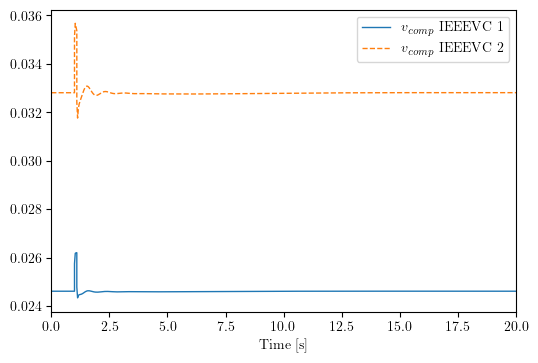

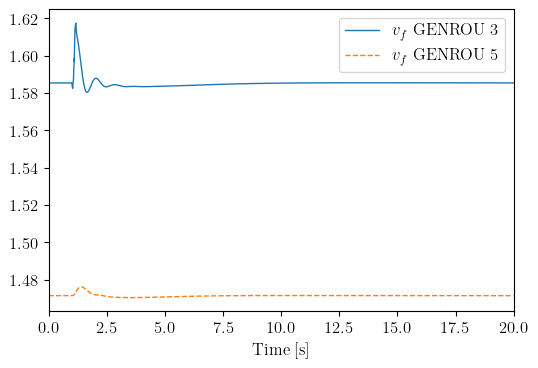

(<Figure size 600x400 with 1 Axes>, <AxesSubplot:xlabel='Time [s]'>)

In [6]:
ss.TDS.plt.plot(ss.IEEEVC.vcomp)
ss.TDS.plt.plot(ss.GENROU.vf,
                a=(2,4))

## Cleanup

In [7]:
!andes misc -C


    _           _         | Version 1.5.0.post18.dev0+g3d8a275a
   /_\  _ _  __| |___ ___ | Python 3.9.6 on Linux, 10/29/2021 09:55:35 PM
  / _ \| ' \/ _` / -_|_-< | 
 /_/ \_\_||_\__,_\___/__/ | This program comes with ABSOLUTELY NO WARRANTY.

No output file found in the working directory.
